<a href="https://colab.research.google.com/github/marwan-ghellai/FlightDelay/blob/main/FlightDelayRev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay (JAN 2015)

In [ ]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
# allows for plots to always be displayed in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
# Upload airlines.csv, airpots.csv, flights.csv
from google.colab import files
csvFiles = files.upload()

Saving airlines.csv to airlines.csv
Saving airports.csv to airports.csv
Saving flights.csv to flights.csv


In [ ]:
# Read file
airlines_data = pd.read_csv('airlines.csv')
airports_data = pd.read_csv('airports.csv')
flights_data = pd.read_csv('flights.csv')

In [ ]:
# Visualize Data
airlines_data

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [ ]:
# Visualize Data
airports_data

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [ ]:
# Visualize Data
flights_data

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,1,31,B6,JFK,BQN,2359,2359.0,0.0,18.0,17.0,...,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469964,1,31,DL,SEA,DTW,2359,2359.0,0.0,16.0,15.0,...,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
469965,1,31,F9,DEN,TPA,2359,2.0,3.0,35.0,37.0,...,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0
469966,1,31,F9,DEN,ATL,2359,2359.0,0.0,40.0,39.0,...,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0


In [ ]:
# The column names as indices.
# The two brackets are required because you are passing a list of columns
loc_data = airports_data[['LATITUDE', 'LONGITUDE']]
loc_data

,LATITUDE,LONGITUDE
0,40.65236,-75.44040
1,32.41132,-99.68190
2,35.04022,-106.60919
3,45.44906,-98.42183
4,31.53552,-84.19447
...,...,...
317,56.48433,-132.36982
318,44.68840,-111.11764
319,36.28187,-94.30681
320,59.50336,-139.66023


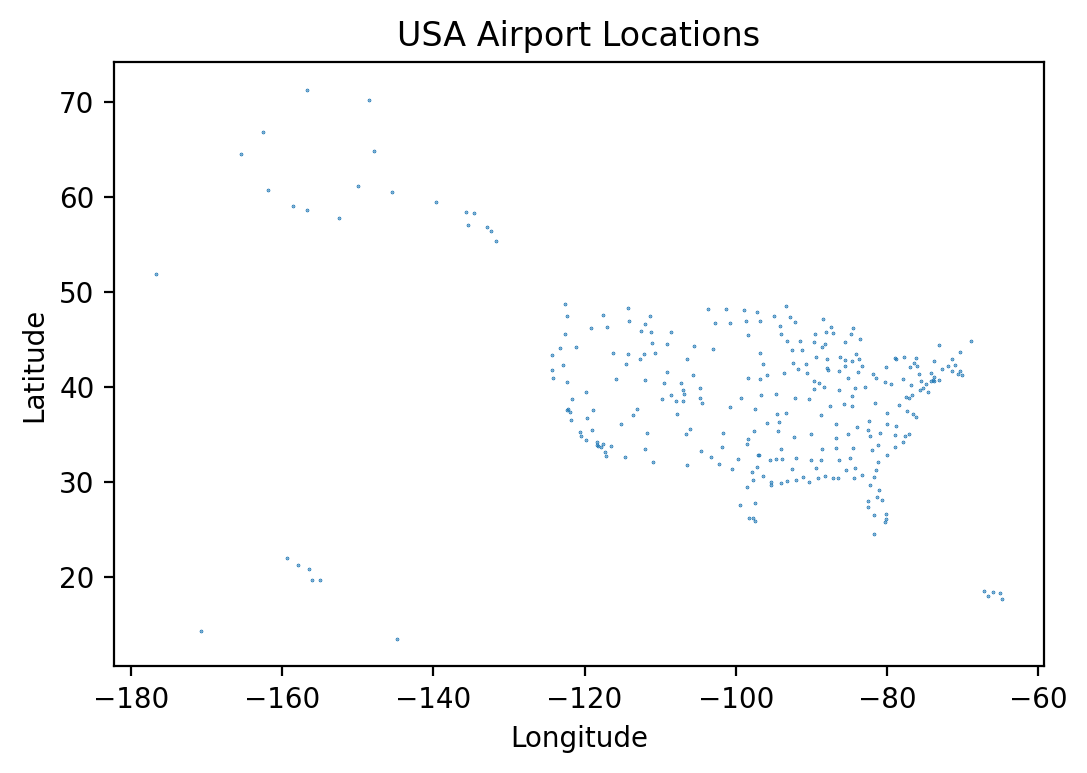

In [ ]:
fig, ax = plt.subplots()
# s=0.1 specifies the size
ax.scatter(loc_data.LONGITUDE, loc_data.LATITUDE, s=0.1)
ax.set_title('USA Airport Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');
fig.set_dpi(200)

In [ ]:
# [['ARRIVAL_DELAY','DEPARTURE_DELAY']] shows dataframe of delays
df = flights_data[['DESTINATION_AIRPORT','ARRIVAL_DELAY','DEPARTURE_DELAY']]
# adding .DESTINATION_AIRPORT at the end creates the rows to be CALLABLE
airports = df.DESTINATION_AIRPORT

In [ ]:
# The following calculates the mean of all columns 
# and groups all similar names i.e. airports under the same group 
delay_mean = df.groupby(airports).mean()

delay_mean

,ARRIVAL_DELAY,DEPARTURE_DELAY
DESTINATION_AIRPORT,,
ABE,4.166667,4.044586
ABI,12.361233,10.643172
ABQ,5.538857,8.567949
ABR,-3.716667,7.524590
ABY,6.812500,9.753086
...,...,...
VPS,3.793566,7.566489
WRG,9.300000,15.393443
XNA,14.845528,14.817568


In [ ]:
# .sort_values will sort alphabetically the column specified in a csv file
key_array = flights_data.sort_values(['DESTINATION_AIRPORT'])
# adding .IATA_CODE at the end creates the rows to be CALLABLE
key_array = key_array.DESTINATION_AIRPORT

# .values allows for the mean values of arrival delay to be callable
mean_arr_array = delay_mean[['ARRIVAL_DELAY']].values[:,0]
# .around will round up values throughout the entire array
mean_arr_array = np.around(mean_arr_array, decimals=2)

# .values allows for the mean values of departure delay to be callable
mean_dep_array = delay_mean[['DEPARTURE_DELAY']].values[:,0]
# .around will round up values throughout the entire array
mean_dep_array = np.around(mean_dep_array, decimals=2)

In [ ]:
# .sort_values will sort alphabetically the column specified in a csv file
key_array = flights_data.sort_values(['DESTINATION_AIRPORT'])
# adding .IATA_CODE at the end creates the rows to be CALLABLE
key_array = key_array.DESTINATION_AIRPORT
# drops any duplicates
key_array = key_array.drop_duplicates(keep = 'last')
key_array

278297    ABE
117844    ABI
356705    ABQ
9034      ABR
303884    ABY
         ... 
70454     VPS
150236    WRG
148691    XNA
461870    YAK
106376    YUM
Name: DESTINATION_AIRPORT, Length: 312, dtype: object

In [ ]:
# airports_data['IATA_CODE'] and key_array should have the same # of airports
# printing both shows discrepancies of the two lists
airports_data['IATA_CODE']

0      ABE
1      ABI
2      ABQ
3      ABR
4      ABY
      ... 
317    WRG
318    WYS
319    XNA
320    YAK
321    YUM
Name: IATA_CODE, Length: 322, dtype: object

In [ ]:
# air_flightsdata and air_airportsdata creates a list of the airports from the csv files
air_flightsdata = flights_data['DESTINATION_AIRPORT'].sort_values()
air_airportsdata = airports_data['IATA_CODE']
# coordinate data of airports
longitude_coor = airports_data['LONGITUDE']
latitude_coor = airports_data['LATITUDE']

In [ ]:
# removal of duplications
air_flightsdata = air_flightsdata.drop_duplicates()

In [ ]:
# the variables are created into lists
# a for loop goes through the data in the airport csv file and checks if
# it is amongst the flights csv file. Any airport that does not match has the index stored
# .count(example) checks if the example is found in the list interested in
removeindex = []
air_airportsdata = list(air_airportsdata)
air_flightsdata = list(air_flightsdata)
longitude_coor = list(longitude_coor)
latitude_coor = list(latitude_coor)
for i in range(len(air_airportsdata)):
  if air_flightsdata.count(air_airportsdata[i]) < 1:
    removeindex.append(i)
removeindex

[5, 13, 29, 30, 89, 133, 147, 161, 219, 318]

In [ ]:
# the loop uses the stored index from the previous code block
# removing airports that are not shared between the two csv sheets
for i in range(len(removeindex)):
  k = removeindex[i] - i
  air_airportsdata.remove(air_airportsdata[k])
  longitude_coor.remove(longitude_coor[k])
  latitude_coor.remove(latitude_coor[k])

In [ ]:
# dictionary created for airport stats
airport_stats = {}
i = 0
for key in key_array:
  airport_stats[key] = {'Mean Arrival Delay': mean_arr_array[i], 'Mean Departure Delay': mean_dep_array[i],
                        'LONGITUDE': longitude_coor[i], 'LATITUDE': latitude_coor[i]}
  i += 1 

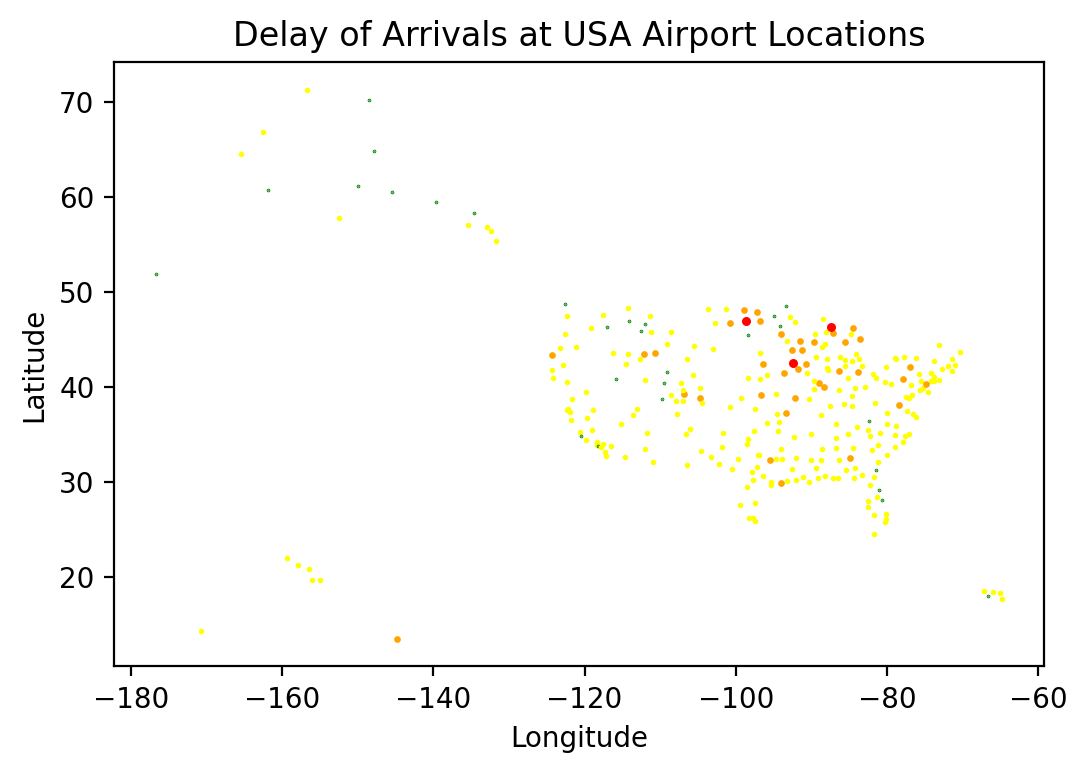

In [ ]:
# Arrival Delay Figure
fig, ax = plt.subplots()
# s=0.2 specifies the size
for key in key_array:
  if airport_stats[key]['Mean Arrival Delay'] <= 0:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=0.1, color = 'green')
  elif airport_stats[key]['Mean Arrival Delay'] <= 15:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=1, color = 'yellow')
  elif airport_stats[key]['Mean Arrival Delay'] <= 30:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=2, color = 'orange')
  else:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=5, color = 'red')
ax.set_title('Delay of Arrivals at USA Airport Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');
fig.set_dpi(200)

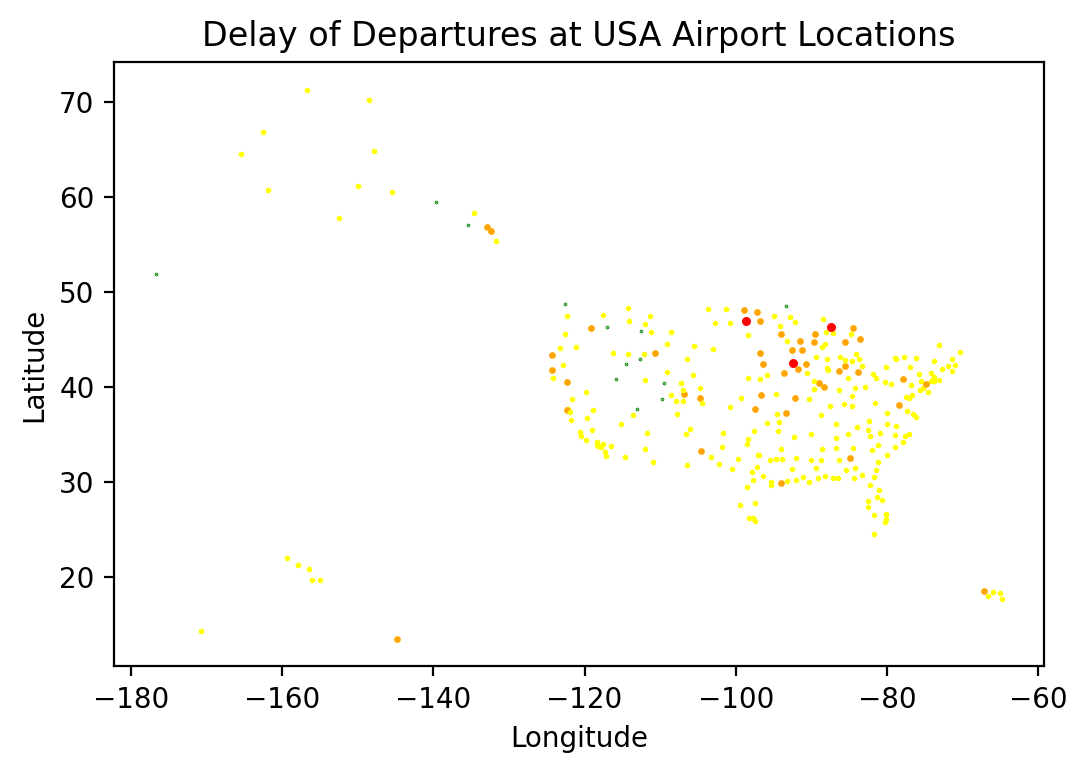

In [ ]:
# Departure Delay Figure
fig, ax = plt.subplots()
# s=0.2 specifies the size
for key in key_array:
  if airport_stats[key]['Mean Departure Delay'] <= 0:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=0.1, color = 'green')
  elif airport_stats[key]['Mean Departure Delay'] <= 15:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=1, color = 'yellow')
  elif airport_stats[key]['Mean Departure Delay'] <= 30:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=2, color = 'orange')
  else:
    ax.scatter(airport_stats[key]['LONGITUDE'], airport_stats[key]['LATITUDE'], s=5, color = 'red')
ax.set_title('Delay of Departures at USA Airport Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude');
fig.set_dpi(200)

In [ ]:
# [['AIRLINE']] shows dataframe of airlines
df = flights_data[['AIRLINE', 'DEPARTURE_DELAY']]

# adding .AIRLINE at the end creates the rows to be CALLABLE
airlines = df.AIRLINE

In [ ]:
# The following calculates the mean of all columns 
# and groups all similar names i.e. airlines under the same group 
dep_delay_mean = df.groupby(airlines).mean()

In [ ]:
# .sort_values will sort alphabetically the column specified in a csv file
key_array = airlines_data.sort_values(['IATA_CODE'])
# adding .IATA_CODE at the end creates the rows to be CALLABLE
key_array = key_array.IATA_CODE

# .values allows for the mean values of departure delay to be callable
mean_val_array = dep_delay_mean[['DEPARTURE_DELAY']].values[:,0]
# .around will round up values throughout the entire array
mean_val_array = np.around(mean_val_array, decimals=2)

In [ ]:
# The LHS creates a new column, restoring it with the cancelled flights from flights.csv
df['CANCELLED'] = flights_data['CANCELLED']
# remove departure delay
df = df.drop(['DEPARTURE_DELAY'], axis = 1)

<ipython-input-24-dc92ab280789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CANCELLED'] = flights_data['CANCELLED']


In [ ]:
# The following sums the total for all columns 
# and groups all similar names i.e. airlines under the same group 
canceled_flight_sum = df.groupby(airlines).sum()

In [ ]:
# .values allows for the sum values of cancelled flights to be callable
sum_val_array = canceled_flight_sum [['CANCELLED']].values[:,0]
# .around will round up values throughout the entire array
sum_val_array = np.around(sum_val_array, decimals=2)

In [ ]:
# Loop through each key and adds to an empty dictionary
# adding the appropriate stats for each key
airline_stats = {}
i = 0
for key in key_array:
  airline_stats[key] = {'Mean Departure Delay': mean_val_array[i], 
            'Cancelled Flights': sum_val_array[i]}
  i += 1

In [ ]:
# Turn dictionary keys to a list 
# Following can also be done list(key_arrays)
airlines_list = list(airline_stats.keys())

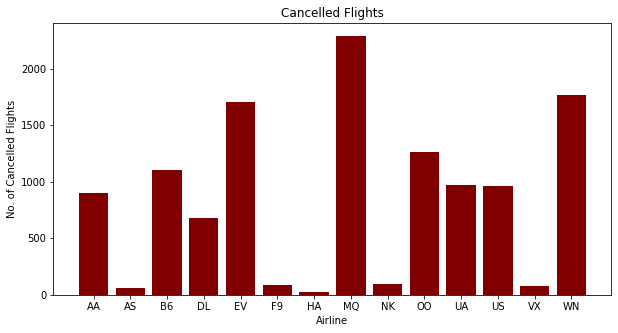

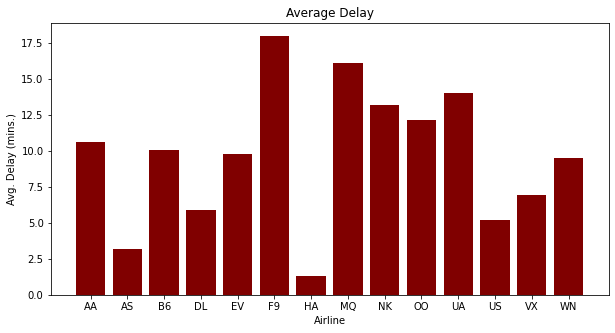

In [ ]:
fig1 = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(airlines_list, sum_val_array, color ='maroon')
plt.xlabel("Airline")
plt.ylabel("No. of Cancelled Flights")
plt.title("Cancelled Flights")
plt.show()

print()

fig2 = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(airlines_list, mean_val_array, color ='maroon')
plt.xlabel("Airline")
plt.ylabel("Avg. Delay (mins.)")
plt.title("Average Delay")
plt.show()

In [ ]:
# dftrain drops cols listed, keeping the cols we want to work with
dftrain = flights_data.drop(['MONTH', 'DAY','CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
                        'SECURITY_DELAY', 'AIRLINE_DELAY',
                        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis = 1)
dftrain = dftrain.dropna()
# pred_input is all columns except the column being predicted
# pred is the column that will be predicted
pred_input = dftrain.drop('ARRIVAL_DELAY', axis = 1)
ydata = dftrain['ARRIVAL_DELAY']

# Train data
x_train, x_test, y_train, y_test = train_test_split(pred_input, ydata, test_size = 0.30)

In [ ]:
# .info() helps us see what is not an int or float which will then be removed
# this is necessary for standard scaling of data
dftrain.info()

# Airline, origin airport, and destination airport are dropped as they are not int or float
x_train = x_train.drop(['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'], axis = 1)
x_test = x_test.drop(['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457013 entries, 0 to 469967
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AIRLINE              457013 non-null  object 
 1   ORIGIN_AIRPORT       457013 non-null  object 
 2   DESTINATION_AIRPORT  457013 non-null  object 
 3   SCHEDULED_DEPARTURE  457013 non-null  int64  
 4   DEPARTURE_TIME       457013 non-null  float64
 5   DEPARTURE_DELAY      457013 non-null  float64
 6   TAXI_OUT             457013 non-null  float64
 7   WHEELS_OFF           457013 non-null  float64
 8   SCHEDULED_TIME       457013 non-null  int64  
 9   ELAPSED_TIME         457013 non-null  float64
 10  AIR_TIME             457013 non-null  float64
 11  DISTANCE             457013 non-null  int64  
 12  WHEELS_ON            457013 non-null  float64
 13  TAXI_IN              457013 non-null  float64
 14  SCHEDULED_ARRIVAL    457013 non-null  int64  
 15  ARRIVAL_TIME     

In [ ]:
# train and test data is standardized. standard scaling is explained well here:
# https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python

sc = StandardScaler()
X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

In [ ]:
# models used for training
LinR = LinearRegression()
Rid = Ridge()

Linear Regression



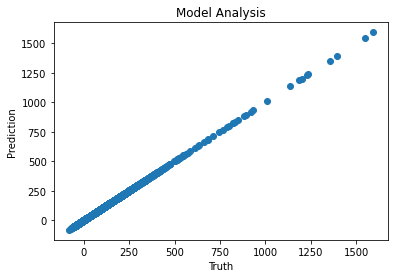

Mean Absolute Error: 8.068423394684439e-14
Mean Squared Error: 1.2526479352295827e-26
Root Mean Squared Error: 1.1192175549148533e-13
R2 :  1.0

Ridge



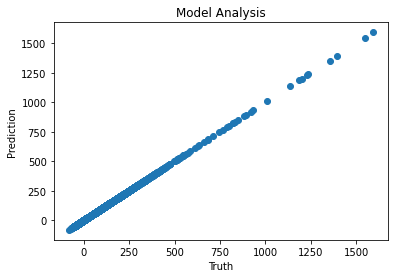

Mean Absolute Error: 0.0019259705131082696
Mean Squared Error: 6.526618509607398e-06
Root Mean Squared Error: 0.0025547247424345734
R2 :  0.9999999958602483



In [ ]:
# Output of model prediction vs truth as well as MSE, MAE, Root MSE, and R2
for model, name in zip([LinR, Rid],  ['Linear Regression','Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print()
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()